# Vehicle Detection

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


Text(0.5,1,'Example Not-car Image')

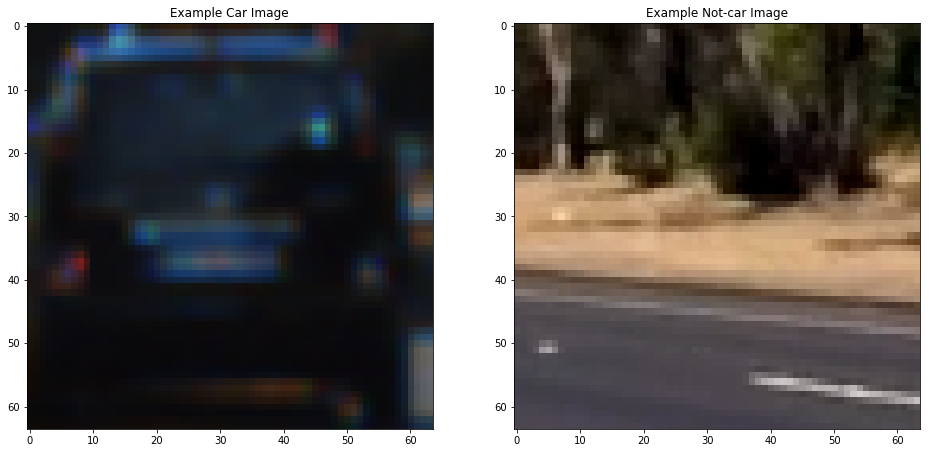

In [25]:
# Histogram of Oriented Gradients (HOG)

# 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

# I started by reading in all the vehicle and non-vehicle images. 
# Here is an example of one of each of the vehicle and non-vehicle classes:

# read in data
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
#from skimage.feature import hog
#from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

def readVehicleList(name):
    carlist = []
    images = glob.glob('data/'+name+'/**/*.png', recursive=True)
    for file in images:
        carlist.append(file)
        
    return carlist

cars = readVehicleList('vehicles')
notcars = readVehicleList('non-vehicles')

# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
# sample_size = 500
# cars = cars[0:sample_size]
# notcars = notcars[0:sample_size]

# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')


/home/advlab/miniconda3/envs/sdcnd/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Text(0.5,1,'HOG Visualization')

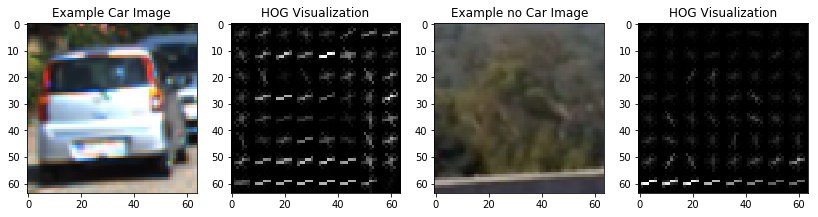

In [16]:

# I then explored different color spaces and different skimage.hog() parameters 
# (orientations, pixels_per_cell, and cells_per_block). 
# I grabbed random images from each of the two classes and displayed them 
# to get a feel for what the skimage.hog() output looks like.
from lesson_functions import *
# import lesson_functions as LF


       
def get_rand_img_hog(cars, orient, pix_per_cell, cell_per_block):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(cars))
    # Read in the image
    image = mpimg.imread(cars[ind])
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Call our function with vis=True to see an image output
    result = get_hog_features(gray, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)
    return result, image
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
(carfeatures, carhog_image), carimage = get_rand_img_hog(cars, orient, pix_per_cell, cell_per_block)
(nocarfeatures, nocarhog_image), nocarimage = get_rand_img_hog(notcars, orient, pix_per_cell, cell_per_block)


# Plot the examples
fig = plt.figure(figsize=(14,8))
plt.subplot(141)
plt.imshow(carimage, cmap='gray')
plt.title('Example Car Image')
plt.subplot(142)
plt.imshow(carhog_image, cmap='gray')
plt.title('HOG Visualization')
plt.subplot(143)
plt.imshow(nocarimage, cmap='gray')
plt.title('Example no Car Image')
plt.subplot(144)
plt.imshow(nocarhog_image, cmap='gray')
plt.title('HOG Visualization')


/home/advlab/miniconda3/envs/sdcnd/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Car samples:  17584
Notcar samples:  17936


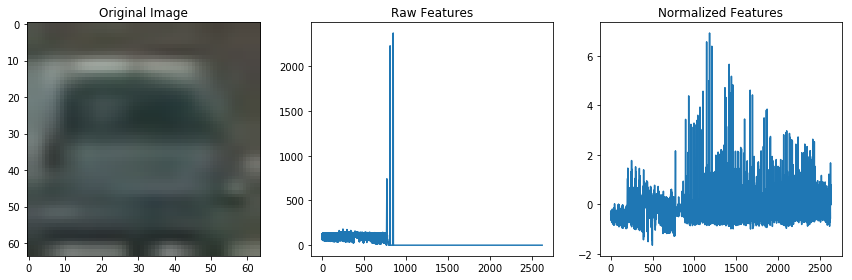

In [8]:
# 2. Explain how you settled on your final choice of HOG parameters.
# I tried various combinations of parameters 
from sklearn.preprocessing import StandardScaler

### TODO: Tweak these parameters and see how the results change.
color_space = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
print ('Car samples: ', len(car_features))

notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
print ('Notcar samples: ', len(notcar_features))

if len(car_features) > 0:
    # Create an array stack of feature vectors    
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
    
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')
    


# Train SVM Classifier

In [9]:
# 3. Describe how (and identify where in your code) you trained a classifier 
# using your selected HOG features (and color features if you used them).
# I trained a linear SVM 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from sklearn.model_selection import train_test_split

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svr = svm.SVC()
# clf = GridSearchCV(svr, parameters)
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

# Check the prediction time for a single sample
t=time.time()
n_predict = 10
n_start = np.random.randint(0, 100)
print('Predictions: ', svc.predict(X_test[n_start:n_start+n_predict]))
print('Actual data: ', y_test[n_start:n_start+n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2628
7.7 Seconds to train SVC...
Test Accuracy of SVC =  0.9875
Predictions:  [ 1.  1.  1.  0.  0.  1.  1.  0.  0.  0.]
Actual data:  [ 1.  1.  1.  0.  0.  1.  1.  0.  0.  0.]
0.00152 Seconds to predict 10 labels with SVC


# Sliding Window Search

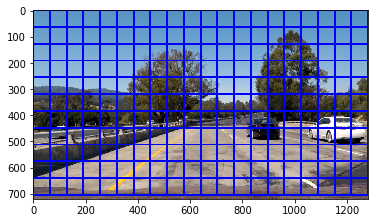

In [10]:
image = mpimg.imread('test_images/test1.jpg')


windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

/home/advlab/miniconda3/envs/sdcnd/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


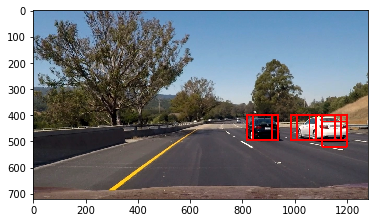

In [19]:
from scipy.ndimage.measurements import label
def showImg(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def predictImg(image, display = False):
    # Define a function you will pass an image 
    # and the list of windows to be searched (output of slide_windows())
    def search_windows(img, windows, clf, scaler, color_space='RGB', 
                        spatial_size=(32, 32), hist_bins=32, 
                        hist_range=(0, 256), orient=9, 
                        pix_per_cell=8, cell_per_block=2, 
                        hog_channel=0, spatial_feat=True, 
                        hist_feat=True, hog_feat=True):


        #1) Create an empty list to receive positive detection windows
        on_windows = []
        #2) Iterate over all windows in the list
        for window in windows:
            #3) Extract the test window from original image
            test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
    #         plt.imshow(test_img)
    #         plt.show()
            #4) Extract features for that window using single_img_features()
            features = single_img_features(test_img, color_space=color_space, 
                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
            #5) Scale extracted features to be fed to classifier
            test_features = scaler.transform(np.array(features).reshape(1, -1))
            #6) Predict using your classifier
            prediction = clf.predict(test_features)
    #         print(prediction)
            #7) If positive (prediction == 1) then save the window
            if prediction == 1:
                on_windows.append(window)
        #8) Return windows for positive detections
        return on_windows

    draw_image = np.copy(image)

    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    #image = image.astype(np.float32)/255

    y_start_stop = [400, 650] # Min and max in y to search in slide_window()

#     windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                         xy_window=(96, 96), xy_overlap=(0.5, 0.5))
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 640], 
                    xy_window=(96, 96), xy_overlap=(0.75, 0.75))

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)   
    if display:
        showImg(window_img)
#         plt.imshow(window_img)
    return hot_windows


filename = 'test_images/test6.jpg'
# image = mpimg.imread(filename)
image = cv2.imread(filename)
# image = mpimg.imread(X_test)
hot_windows = predictImg(image, True)



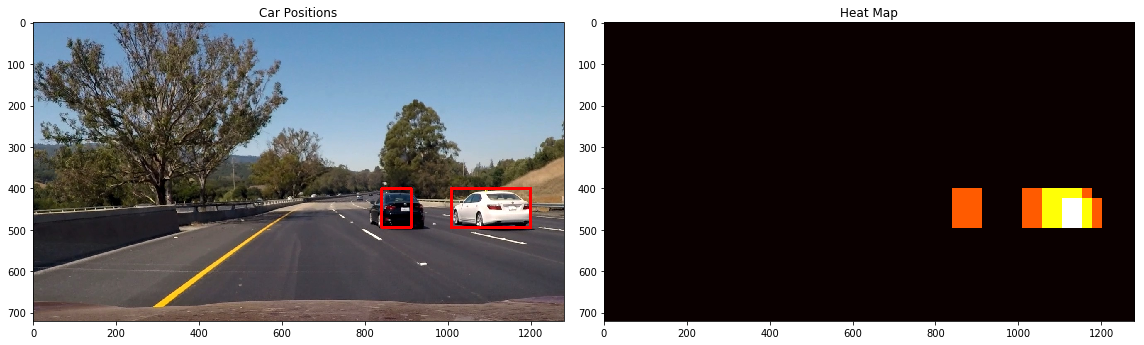

In [23]:
# 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives 
# and some method for combining overlapping bounding boxes.
# I recorded the positions of positive detections in each frame of the video. 
# From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions. 
# I then used scipy.ndimage.measurements.label() to identify individual blobs in the heatmap. 
# I then assumed each blob corresponded to a vehicle. 
# I constructed bounding boxes to cover the area of each blob detected.

def detectHeat(image, box_list, display = False):
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    def add_heat(heatmap, bbox_list):
        # Iterate through list of bboxes
        for box in bbox_list:
            # Add += 1 for all pixels inside each bbox
            # Assuming each "box" takes the form ((x1, y1), (x2, y2))
            heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

        # Return updated heatmap
        return heatmap# Iterate through list of bboxes

    def apply_threshold(heatmap, threshold):
        # Zero out pixels below the threshold
        heatmap[heatmap <= threshold] = 0
        # Return thresholded map
        return heatmap

    def draw_labeled_bboxes(img, labels):
        # Iterate through all detected cars
        for car_number in range(1, labels[1]+1):
            # Find pixels with each car_number label value
            nonzero = (labels[0] == car_number).nonzero()
            # Identify x and y values of those pixels
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            # Define a bounding box based on min/max x and y
            bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
            # Draw the box on the image
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        # Return the image
        return img

    # Add heat to each box in box list
    heat = add_heat(heat,box_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    if display:
        fig = plt.figure(figsize=(16,6))
        plt.subplot(121)
        draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
        plt.imshow(draw_img)
        plt.title('Car Positions')
        plt.subplot(122)
        plt.imshow(heatmap, cmap='hot')
        plt.title('Heat Map')
        fig.tight_layout()
        
    return draw_img

# list of boxes for one of the images shown above

# Read in image similar to one shown above 
# image = mpimg.imread(filename)
# Here's an example result showing the heatmap from a series of frames of video, 
# the result of scipy.ndimage.measurements.label() 
# and the bounding boxes then overlaid on the last frame of video:

# Here are six frames and their corresponding heatmaps:
draw_img = detectHeat(image, hot_windows, True)

In [24]:
import os
# Video Implementation
# 1. Provide a link to your final video output. 
# Your pipeline should perform reasonably well on the entire project video (somewhat wobbly 
# or unstable bounding boxes are ok as long as you are identifying the vehicles most of the 
# with minimal false positives.)
#pipeline for each image
def pipelineImg(image, display = False):
    hot_windows = predictImg(image, display)
    return detectHeat(image, hot_windows, display)

def getOutputName(path, post):
    extension = os.path.splitext(path)[-1]
    N = len(extension)
    return path[:-N]+'_'+post+extension

def pipelineVid(videoPath):
    cap = cv2.VideoCapture(videoPath)
    width = int(cap.get(3))   # float
    height = int(cap.get(4))
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    # filename
    outputfile = getOutputName(videoPath, 'out')
    out = cv2.VideoWriter(outputfile,fourcc, 20.0, (width,height))
    print(videoPath, outputfile)
    cnt = 0
    while(cap.isOpened()):
        ret, frame = cap.read()
        
        if ret==True:
            cnt += 1
            # predict
            pred_img = pipelineImg(frame)
            # write the flipped frame
            out.write(pred_img)
            
            print(cnt, end='\r')
#             cv2.imshow('frame',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
#             if cnt > 10:
#                 break
        else:
            break
        
    print(cnt)
    # Release everything if job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    

pipelineVid('project_video.mp4')
# pipelineVid('test_video.mp4')

# Here's a link to my video result


project_video.mp4 project_video_out.mp4


/home/advlab/miniconda3/envs/sdcnd/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


1253
